In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thursday November 29 12:01:00 2018

@author: Ben_Lucas
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.stats import pearsonr

In [25]:
class TrialData:    
    def __init__(self, line_length, reported_ratio, pt1, pt2):
        self.line_length = line_length
        self.reported_ratio = reported_ratio
        self.pt_distance = distance.euclidean(pt1, pt2)
        self.actual_ratio = self.pt_distance / self.line_length
        self.measurement_error = self.MeasureRelativeError()
        self.absolute_error = self.MeasureAbsoluteError()
        self.point_displacement = self.MeasureDisplacement(pt1, pt2)
        self.point_alignment = self.MeasureAlignment(pt1, pt2)
        
    def MeasureDisplacement(self, pt1, pt2):
        line_center = [0.5*(20.0 + (20 + self.line_length)), 180]
        point_center = map(lambda x: 0.5*(x[0] + x[1]) , zip(pt1,pt2))
        return distance.euclidean(line_center, point_center)
    
    def MeasureAlignment(self, pt1, pt2):
        line_vec = np.asarray([1,0])
        pt_vec = np.asarray(pt2) - np.asarray(pt1)
        pt_vec = pt_vec / np.linalg.norm(pt_vec)
        alignment = np.abs(np.dot(line_vec, pt_vec))
        return alignment
    
    def MeasureRelativeError(self):
        measurement_error = np.abs(self.reported_ratio - self.actual_ratio)/self.actual_ratio
        return measurement_error
    
    def MeasureAbsoluteError(self):
        reported_size = self.line_length * self.reported_ratio
        return np.abs(self.pt_distance - reported_size)

    
def LoadTestData(filename):
    f = open(filename, 'r')
    file_data = f.readlines()
    trial_data_list = []
    for i in range(1, len(file_data)):
        trial_data_list.append(ParseEntry(file_data[i]))
    return trial_data_list
    
    
def ParseEntry(entry):
    fields = entry.split("#")
    line_length = float(fields[0].split(":")[1])
    pt1_x = float(fields[1].split(":")[1])
    pt1_y = float(fields[2].split(":")[1])
    pt2_x = float(fields[3].split(":")[1])
    pt2_y = float(fields[4].split(":")[1])
    
    reported_ratio = float(fields[5].split(":")[1])
    return TrialData(line_length, reported_ratio, [pt1_x, pt1_y], [pt2_x, pt2_y])


In [24]:
# Load Data:
fdir = '/Users/benjaminlucas/Documents/LinearScalePerception/'
filename = fdir + "LinearPerceptionTrialData_LongSet.txt"
trials = LoadTestData(filename)


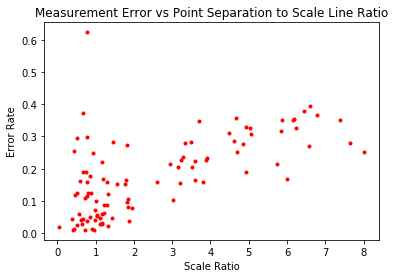

In [10]:
# Effect of Line to point ratio vs error
error = [tr.measurement_error for tr in trials if tr.measurement_error < 1.0]
actual_ratio = [tr.actual_ratio for tr in trials if tr.measurement_error < 1.0]

plt.figure()
plt.plot(actual_ratio, error, 'r.')
plt.title("Measurement Error vs Point Separation to Scale Line Ratio")
plt.xlabel("Scale Ratio")
plt.ylabel("Error Rate")
plt.show()

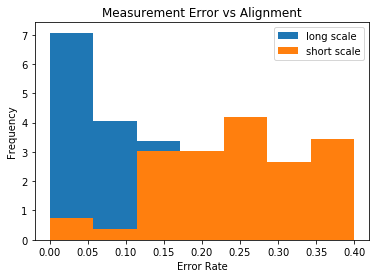

In [11]:
# Effect of a short scale line on estimation:
error_long = [tr.measurement_error for tr in trials if tr.line_length > 80 and tr.measurement_error < 1]
error_short = [tr.measurement_error for tr in trials if tr.line_length < 80 and tr.measurement_error < 1]
error_bins = np.linspace(0,0.4,8)
plt.figure()
plt.hist(error_long, normed = True, bins = error_bins)
plt.hist(error_short, normed = True, bins = error_bins)
plt.title("Measurement Error vs Alignment")
plt.xlabel("Error Rate")
plt.ylabel("Frequency")
plt.legend(['long scale', 'short scale'])
plt.show()

1
5
13
14
9
5
1
5


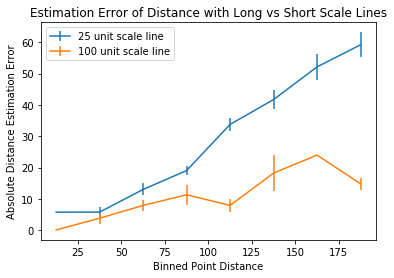

101.12219739167658


In [21]:
# Bin trials by point distance to look at absolute error
d = [tr.pt_distance for tr in trials]
pt_dist = []
mean_error_short = []
mean_error_long = []
std_err_short = []
std_err_long = []

bins = np.linspace(0,200,9)
for i in range(len(bins)-1):
    pt_dist.append(np.mean([bins[i],bins[i+1]]))
    error_d_short = []
    error_d_long = []
    for tr in trials:
        if tr.pt_distance > bins[i] and tr.pt_distance <= bins[i+1]:
            if tr.line_length < 50:
                error_d_short.append(tr.absolute_error)
            else:
                error_d_long.append(tr.absolute_error)
    print len(error_d_long)
    mean_error_short.append(np.mean(error_d_short))
    mean_error_long.append(np.mean(error_d_long))
    std_err_short.append(np.std(error_d_short)/np.sqrt(len(error_d_short)))
    std_err_long.append(np.std(error_d_long)/np.sqrt(len(error_d_long)))

plt.figure()
plt.errorbar(pt_dist, mean_error_short, std_err_short)
plt.errorbar(pt_dist, mean_error_long, std_err_long)
#plt.plot(pt_dist, mean_error_short,'r.', pt_dist, mean_error_long, 'b.')
plt.legend(['25 unit scale line', '100 unit scale line'])
plt.xlabel('Binned Point Distance')
plt.ylabel('Absolute Distance Estimation Error')
plt.title('Estimation Error of Distance with Long vs Short Scale Lines')
plt.show()


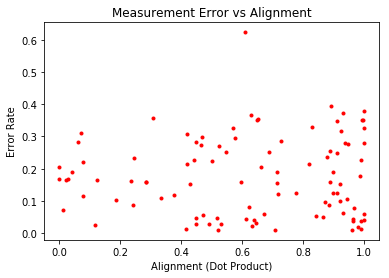

In [13]:
#Effect of alignment (between points and scale line) on error
error = [tr.measurement_error for tr in trials]
alignment = [tr.point_alignment for tr in trials]

plt.plot(alignment, error,'r.')
plt.title("Measurement Error vs Alignment")
plt.xlabel("Alignment (Dot Product)")
plt.ylabel("Error Rate")
plt.show()

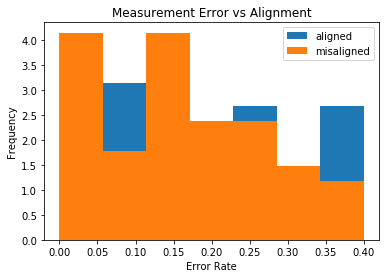

In [14]:
# binned alignment:
error_alind = [tr.measurement_error for tr in trials if tr.point_alignment > 0.8 and tr.measurement_error < 1]
error_malind = [tr.measurement_error for tr in trials if tr.point_alignment < 0.8 and tr.measurement_error < 1]
error_bins = np.linspace(0,0.4,8)

plt.figure()
plt.hist(error_alind, normed = True, bins = error_bins)
plt.hist(error_malind, normed = True, bins = error_bins)
plt.title("Measurement Error vs Alignment")
plt.xlabel("Error Rate")
plt.ylabel("Frequency")
plt.legend(['aligned', 'misaligned'])
plt.show()

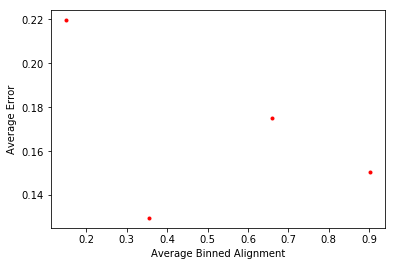

In [15]:
#Effect of Visual alignment alone - requires a separate data set
#LinearPerception_AlighnmentOnlyTrialData.txt - which should be generated
# using a modification to the experiment with only a single scale length
fdir = '/Users/benjaminlucas/Documents/LinearScalePerception/'
filename = fdir + "LinearPerception_AlighnmentOnlyTrialData.txt"
trials_algn = LoadTestData(filename)

align_bins = np.linspace(0,1,5)
average_alignment = []
average_error = []
for i in range(len(align_bins)-1):
    error_bin = []
    alignment_bin = []
    for tr in trials_algn:
        if tr.point_alignment > align_bins[i] and tr.point_alignment <= align_bins[i+1]:
            error_bin.append(tr.measurement_error)
            alignment_bin.append(tr.point_alignment)
    average_alignment.append(np.mean(alignment_bin))
    average_error.append(np.mean(error_bin))

plt.figure()
plt.plot(average_alignment, average_error,'r.')
plt.xlabel('Average Binned Alignment')
plt.ylabel('Average Error')
plt.show()

In [26]:

tmp = [tr.pt_distance for tr in trials]
print np.mean(tmp)


101.12219739167658
